In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score , recall_score , f1_score
# from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

# import pandas as pd 
# import numpy as np 
# import seaborn as sns
# import matplotlib.pyplot as plt

# # from sklearnmodel_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier

# import warnings
# warnings.filterwarnings('ignore')



In [3]:
data = pd.read_csv('C:\\Users\\AI\\Desktop\\diabetesPredction\\diabetes.csv')

## Explore Data 

In [4]:
data.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.duplicated().sum()

0

## Analysis

In [8]:
data.corr() # relishinship between column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

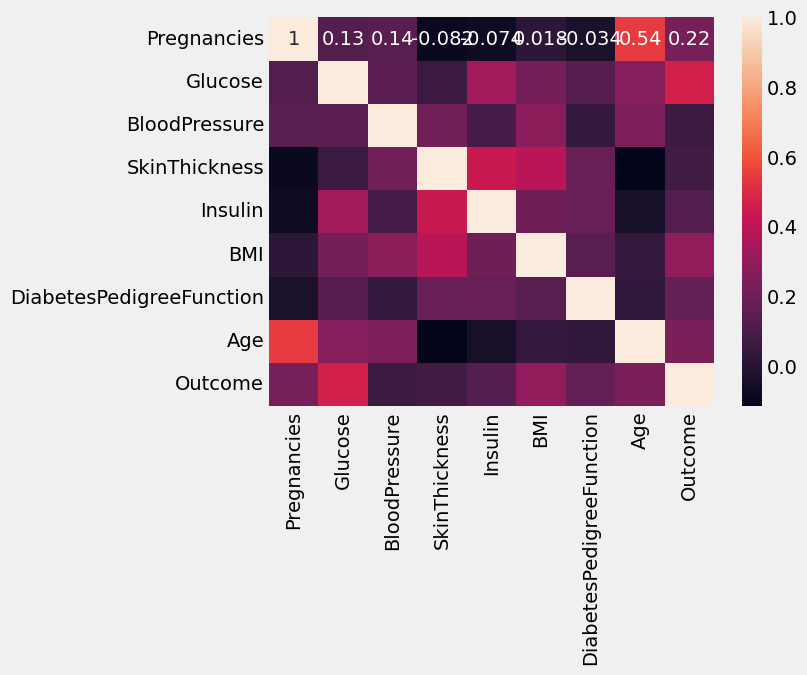

In [9]:
sns.heatmap(data.corr() , annot=True)

<Axes: xlabel='Outcome', ylabel='count'>

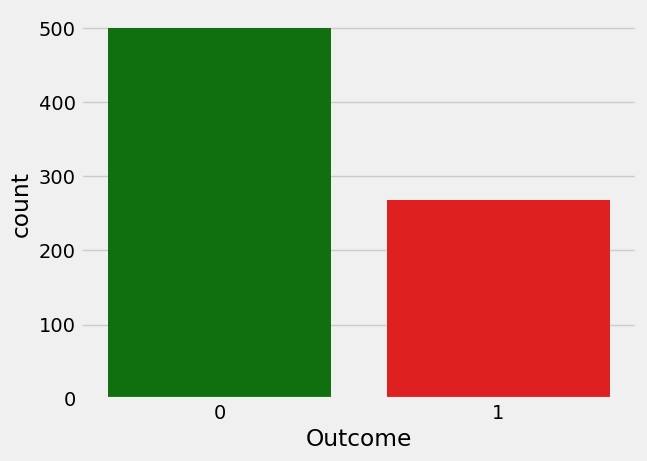

In [10]:
sns.countplot(x = 'Outcome', data=data , palette=['g' , 'r'])

<function matplotlib.pyplot.show(close=None, block=None)>

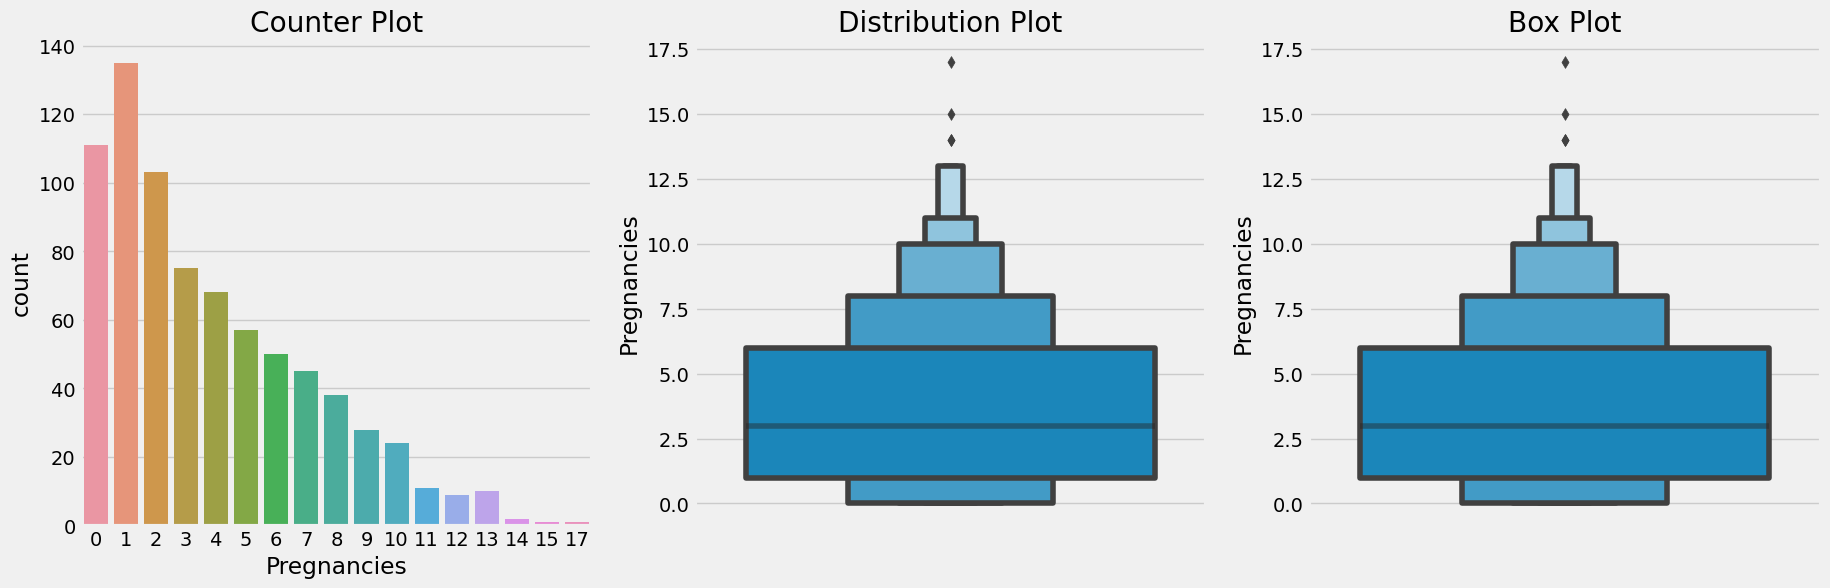

In [11]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Counter Plot')
sns.countplot(x = 'Pregnancies', data = data )

plt.subplot(1,3,2) 
plt.title('Distribution Plot')
sns.boxenplot(y=data['Pregnancies'])

plt.subplot(1,3,3) 
plt.title('Box Plot')
sns.boxenplot(y=data['Pregnancies'])

plt.show

<Axes: >

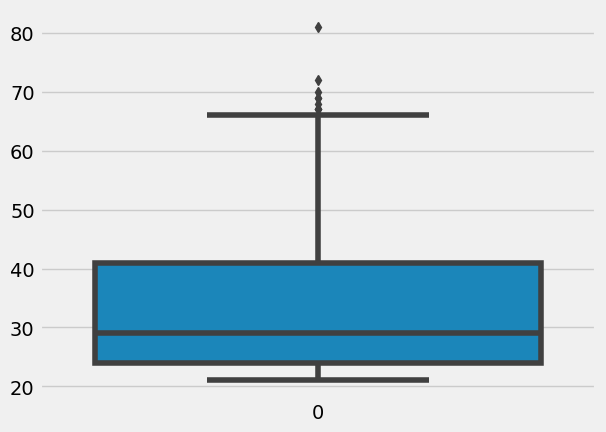

In [12]:
sns.boxplot(data.Age)

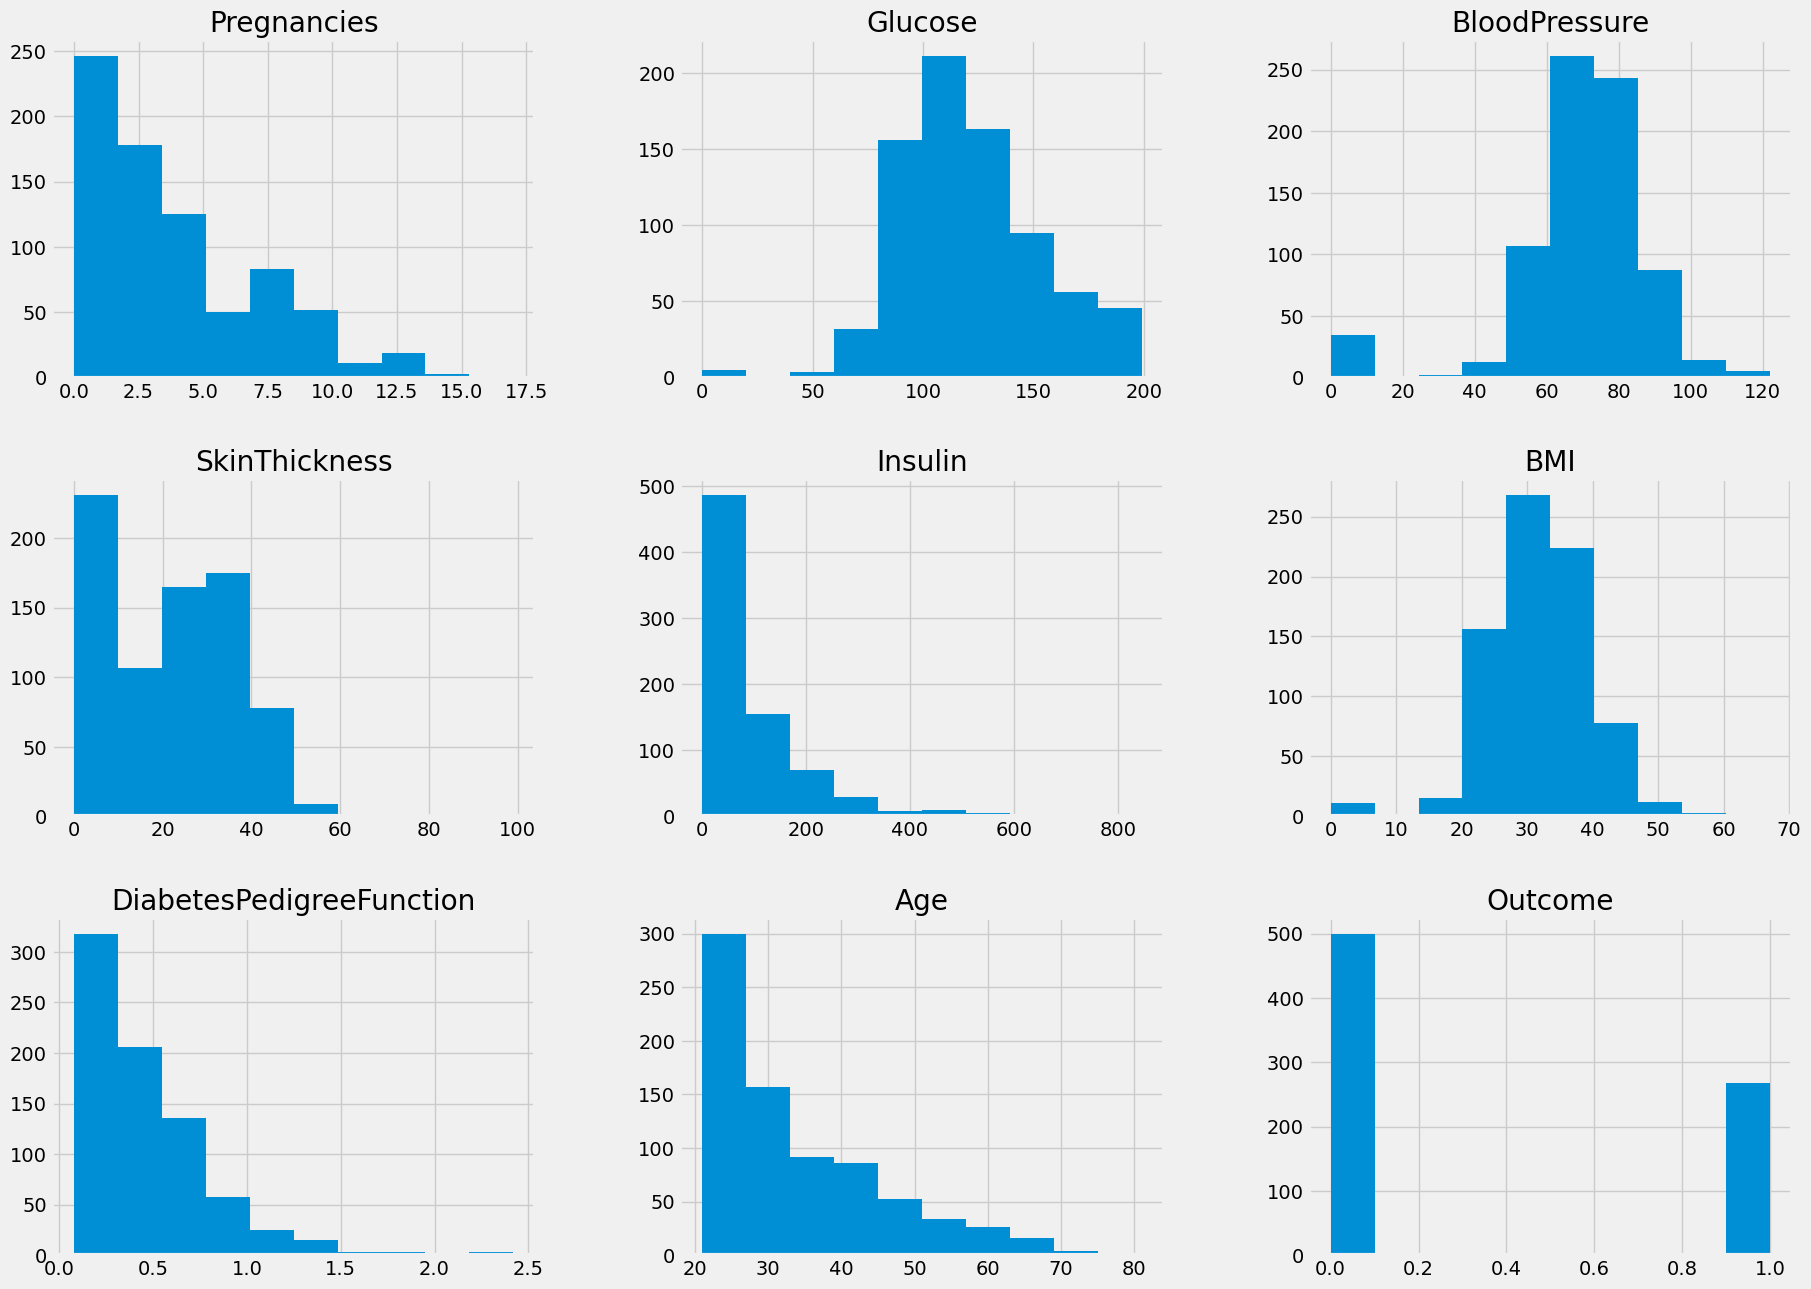

In [13]:
data.hist(figsize=(20,15))
plt.show()

## Creat Model 

In [14]:
# تقسيم البيانات إلى ميزات (X) وهدف (y)
X = data.drop('Outcome', axis=1)  # الميزات
y = data['Outcome']  # الهدف

In [15]:
# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:

# نموذج Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)



DecisionTreeClassifier()

In [17]:
# نموذج Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [18]:
# دالة للتنبؤ بحالة الإصابة
def predict_diabetes(model, input_data):
    input_data = np.array(input_data).reshape(1, -1)
    result = model.predict(input_data)
    return result[0]



In [23]:
# واجهة المستخدم
print("اختر النموذج الذي ترغب في استخدامه:")
print("1. Decision Tree")
print("2. Logistic Regression")

model_choice = input("أدخل رقم الخيار (1 أو 2): ")

اختر النموذج الذي ترغب في استخدامه:
1. Decision Tree
2. Logistic Regression


أدخل رقم الخيار (1 أو 2):  1


In [24]:
# تحقق من اختيار المستخدم
if model_choice not in ['1', '2']:
    print("اختيار غير صحيح. يرجى اختيار 1 أو 2.")
else:
    # إدخال بيانات المستخدم
    user_input = []
    features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
    
    for feature in features:
        value = float(input(f"أدخل قيمة {feature}: "))
        user_input.append(value)

    # اختيار النموذج بناءً على اختيار المستخدم
    if model_choice == '1':
        selected_model = dt_model
        model_name = "Decision Tree"
    else:
        selected_model = lr_model
        model_name = "Logistic Regression"

    # التنبؤ
    prediction = predict_diabetes(selected_model, user_input)
    outcome = "مريض سكري" if prediction == 1 else "غير مريض سكري"
    
    print(f"النموذج المختار: {model_name}")
    print(f"التنبؤ: {outcome}")

أدخل قيمة Pregnancies:  1
أدخل قيمة Glucose:  85
أدخل قيمة BloodPressure:  66
أدخل قيمة SkinThickness:  29
أدخل قيمة Insulin:  0
أدخل قيمة BMI:  26.6
أدخل قيمة DiabetesPedigreeFunction:  0.351
أدخل قيمة Age:  31


النموذج المختار: Decision Tree
التنبؤ: غير مريض سكري


In [26]:
from sklearn.tree import plot_tree

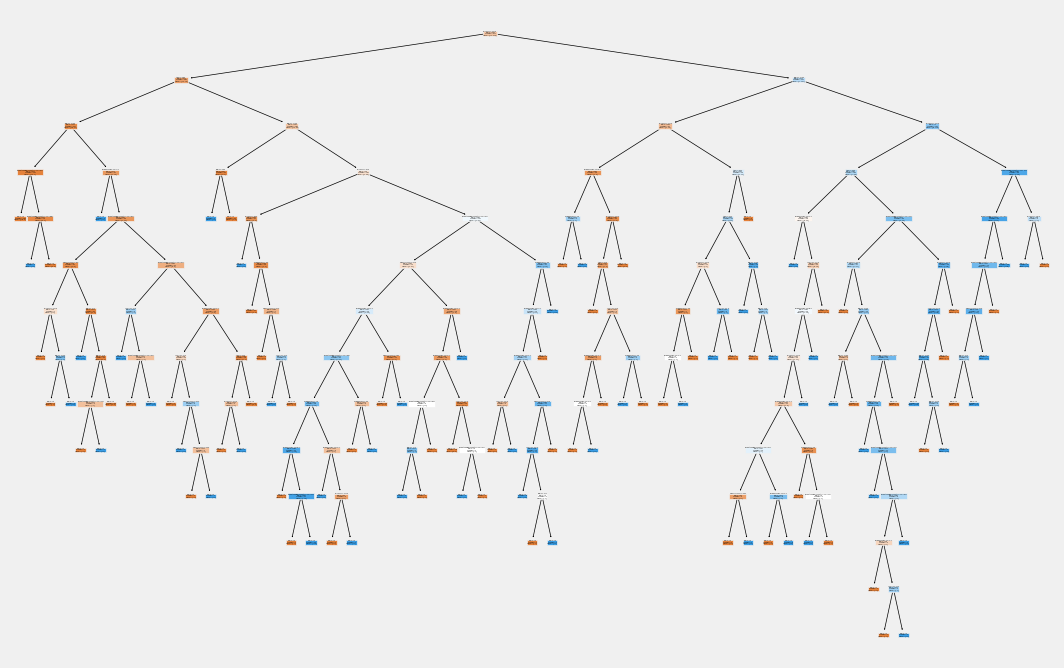

In [28]:
plt.figure(figsize=(12,8))
f = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plot_tree(dt_model,filled=True,feature_names=f)
plt.show()